In [1]:
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [2]:
dta = [10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]

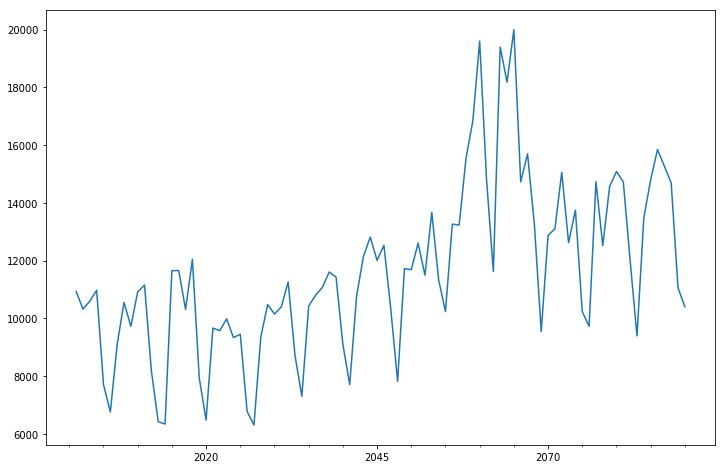

In [3]:
dta = pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001', '2090'))
dta.plot(figsize=(12, 8))

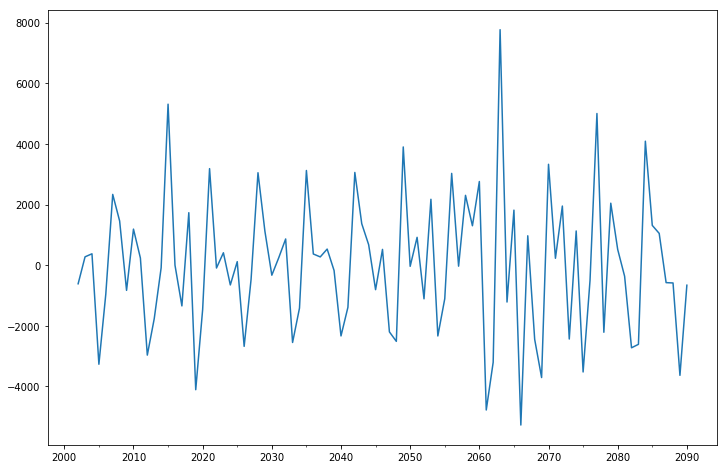

In [4]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

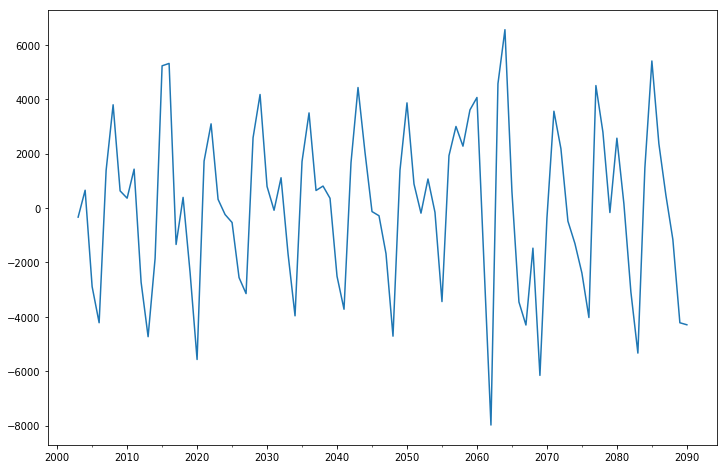

In [5]:
fig = plt.figure(figsize=(12, 8))
ax2 = fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)

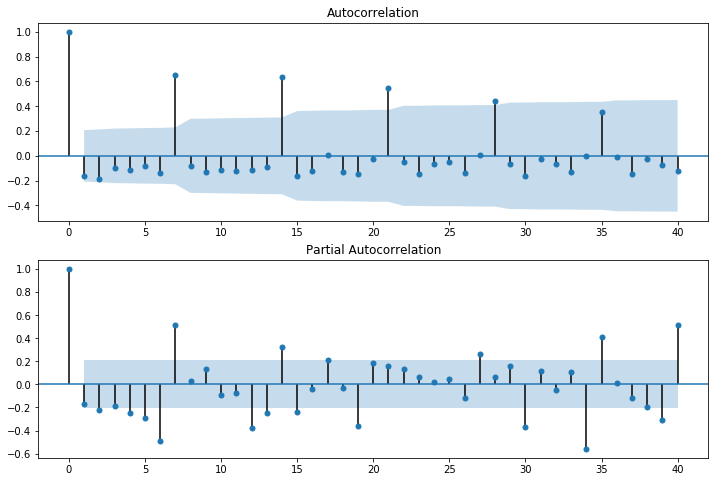

In [6]:
dta = dta.diff(1).dropna()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [7]:
arma_mod20 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\s

1579.7025548588597 1602.100282186449 1588.730435990917
1632.3203732818517 1639.7862823910482 1635.3296669925376


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1581.0916055437567 1605.9779692410782 1591.122584579376


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1581.3957836352479 1606.2821473325694 1591.4267626708672


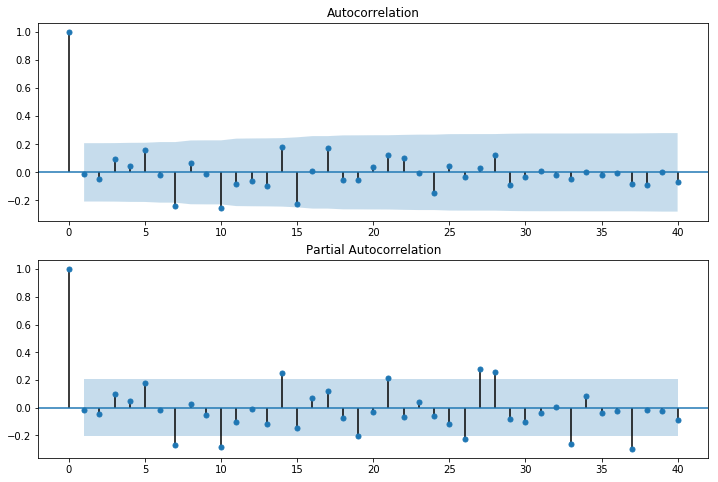

In [8]:
resid = arma_mod20.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [9]:
print(sm.stats.durbin_watson(arma_mod20.resid.values))

2.024248520940425


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


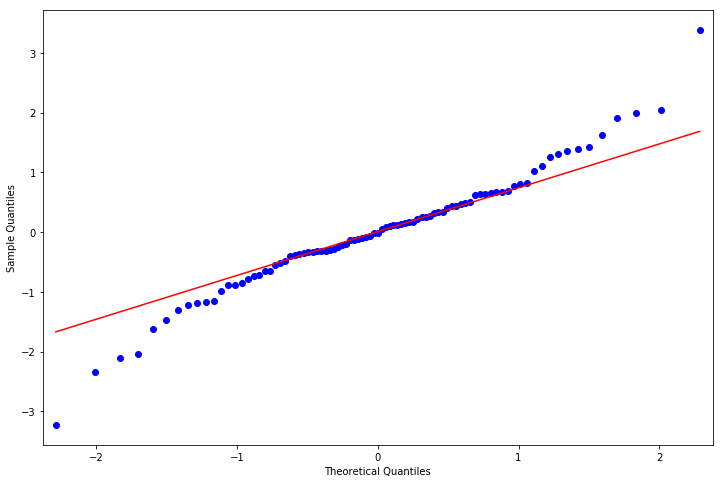

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [11]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.014445   0.019205  0.889782
2.0  -0.047443   0.228740  0.891928
3.0   0.097778   1.129094  0.770056
4.0   0.047513   1.344193  0.853834
5.0   0.156218   3.697162  0.593786
6.0  -0.017855   3.728271  0.713392
7.0  -0.241231   9.475841  0.220273
8.0   0.068080   9.939276  0.269314
9.0  -0.012041   9.953954  0.354226
10.0 -0.256683  16.708556  0.081067
11.0 -0.085177  17.461883  0.094936
12.0 -0.063577  17.887030  0.119164
13.0 -0.096511  18.879614  0.126884
14.0  0.181119  22.422001  0.070349
15.0 -0.223096  27.869349  0.022401
16.0  0.012916  27.887858  0.032609
17.0  0.176769  31.402759  0.017833
18.0 -0.053140  31.724882  0.023694
19.0 -0.057705  32.110142  0.030374
20.0  0.037426  32.274556  0.040459
21.0  0.120519  34.004496  0.036199
22.0  0.102663  35.278543  0.036225
23.0 -0.007830  35.286066  0.048710
24.0 -0.148547  38.035514  0.034383
25.0  0.046255  38.306258  0.043173
26.0 -0.032622  38.443064  0

2090-12-31   -1236.133142
2091-12-31    3548.960286
2092-12-31    1236.646287
2093-12-31     649.920866
2094-12-31    -530.548338
2095-12-31    -611.714664
2096-12-31   -2290.239638
2097-12-31    -726.589446
2098-12-31    2740.805341
2099-12-31     952.958174
2100-12-31     277.187030
Freq: A-DEC, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


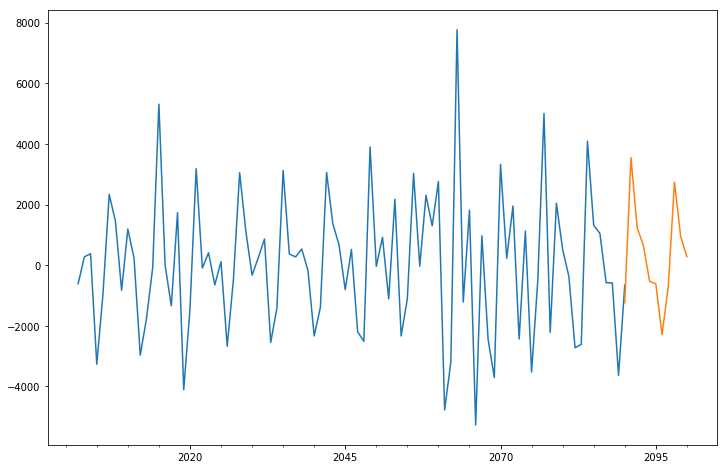

In [12]:
predict_sunspots = arma_mod20.predict('2090', '2100', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)